In [111]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [112]:
Menu = pd.read_csv('crop_recommendation.csv')
Menu.head()
#Menu.label.unique()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [113]:
Menu.shape

(2200, 8)

In [114]:
Menu.dtypes

N                int64
P                int64
K                int64
temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

In [115]:
X = Menu.drop(['label'],axis=1)

In [116]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


In [117]:
scaler = MinMaxScaler()
# transform data
XS = scaler.fit_transform(X)
# XS.head()
XS

array([[0.64285714, 0.26428571, 0.19      , ..., 0.79026683, 0.46626364,
        0.65645778],
       [0.60714286, 0.37857143, 0.18      , ..., 0.77063285, 0.54948026,
        0.74167459],
       [0.42857143, 0.35714286, 0.195     , ..., 0.79397664, 0.67421877,
        0.87571039],
       ...,
       [0.84285714, 0.2       , 0.125     , ..., 0.61788046, 0.44443315,
        0.55007079],
       [0.83571429, 0.19285714, 0.145     , ..., 0.44175991, 0.50604494,
        0.38428046],
       [0.74285714, 0.09285714, 0.125     , ..., 0.53822177, 0.50931694,
        0.43372112]])

In [131]:
# Finding the optimum number of clusters for k-means clustering
wss = []

for i in range(1, 45):
    kmeans = KMeans(n_clusters=i, max_iter=300, random_state=99,n_init=10)
    kmeans.fit(XS)
    wss.append(kmeans.inertia_)

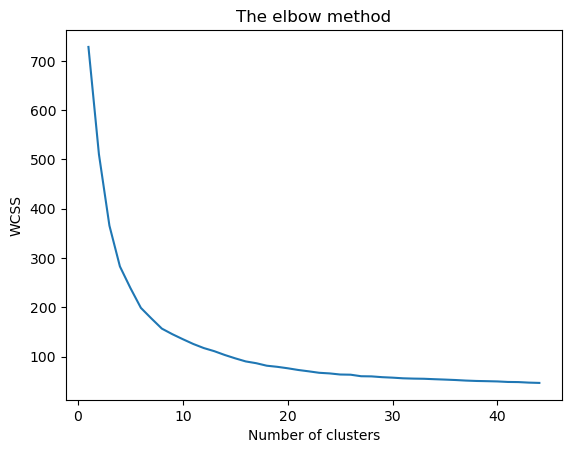

In [132]:
plt.plot(range(1, 45), wss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [133]:
kmeans = KMeans(n_clusters = 4, max_iter = 300, random_state = 99, n_init = 10)
Y = kmeans.fit_predict(XS)

In [134]:
Y

array([1, 1, 1, ..., 1, 1, 1])

In [135]:
sse = kmeans.inertia_
print(sse)

282.96436678643596


In [136]:
score = silhouette_score(XS, kmeans.labels_, metric='euclidean')
score

0.3378576612063048

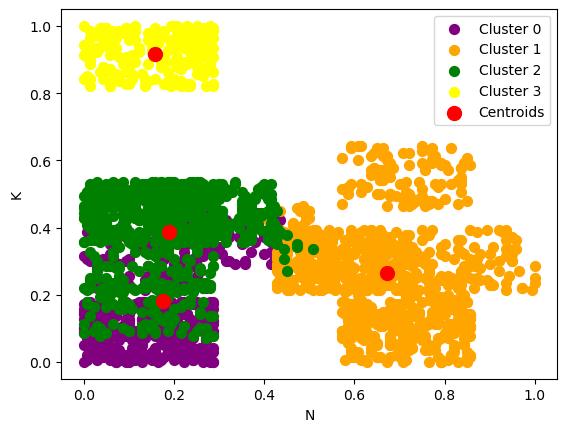

In [137]:
#Visualising the clusters

column0 = 'N'  # Replace with the actual column name
column1 = 'P'  # Replace with the actual column name

# Check if the column names exist in the dataset
if column0 in X.columns and column1 in X.columns:
    # Extract the column indices for "Carbohydrates" and "Protein"
    carb_index = X.columns.get_loc(column0)
    protein_index = X.columns.get_loc(column1)


plt.scatter(XS[Y == 0, carb_index], XS[Y == 0, protein_index], s = 50, c = 'purple', label = 'Cluster 0')
plt.scatter(XS[Y == 1, carb_index], XS[Y == 1, protein_index], s = 50, c = 'orange', label = 'Cluster 1')
plt.scatter(XS[Y == 2, carb_index], XS[Y == 2, protein_index], s = 50, c = 'green', label = 'Cluster 2')
plt.scatter(XS[Y == 3, carb_index], XS[Y == 3, protein_index], s = 50, c = 'yellow', label = 'Cluster 3')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, carb_index], kmeans.cluster_centers_[:,protein_index], s = 100, c = 'red', label = 'Centroids')
plt.xlabel('N')
plt.ylabel('K')
plt.legend()

In [138]:
## we can clearly see that cluster 2 and cluster 0 needs to be further divided 
## we will increase the k now 

In [146]:
kmeans = KMeans(n_clusters = 8, max_iter = 300, random_state = 99, n_init = 10)
Y = kmeans.fit_predict(XS)
score = silhouette_score(XS, kmeans.labels_, metric='euclidean')
score

0.3671112905110319

In [147]:
sse = kmeans.inertia_
print(sse)

156.76445721249084


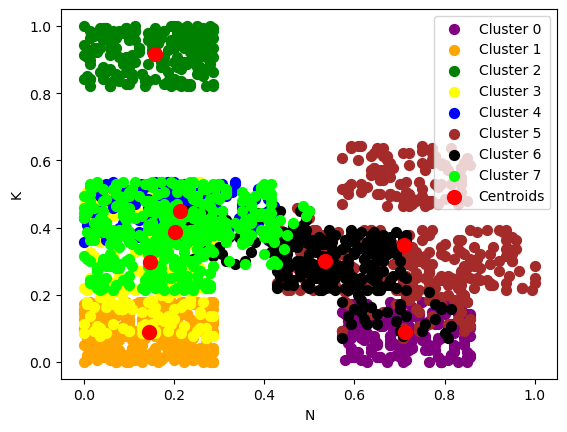

In [148]:
#Visualising the clusters

column0 = 'N'  # Replace with the actual column name
column1 = 'P'  # Replace with the actual column name

# Check if the column names exist in the dataset
if column0 in X.columns and column1 in X.columns:
    # Extract the column indices for "Carbohydrates" and "Protein"
    carb_index = X.columns.get_loc(column0)
    protein_index = X.columns.get_loc(column1)


plt.scatter(XS[Y == 0, carb_index], XS[Y == 0, protein_index], s = 50, c = 'purple', label = 'Cluster 0')
plt.scatter(XS[Y == 1, carb_index], XS[Y == 1, protein_index], s = 50, c = 'orange', label = 'Cluster 1')
plt.scatter(XS[Y == 2, carb_index], XS[Y == 2, protein_index], s = 50, c = 'green', label = 'Cluster 2')
plt.scatter(XS[Y == 3, carb_index], XS[Y == 3, protein_index], s = 50, c = 'yellow', label = 'Cluster 3')
plt.scatter(XS[Y == 4, carb_index], XS[Y == 4, protein_index], s = 50, c = 'blue', label = 'Cluster 4')
plt.scatter(XS[Y == 5, carb_index], XS[Y == 5, protein_index], s = 50, c = 'brown', label = 'Cluster 5')
plt.scatter(XS[Y == 6, carb_index], XS[Y == 6, protein_index], s = 50, c = 'black', label = 'Cluster 6')
plt.scatter(XS[Y == 7, carb_index], XS[Y == 7, protein_index], s = 50, c = 'lime', label = 'Cluster 7')
#plt.scatter(XS[Y == 8, carb_index], XS[Y == 8, protein_index], s = 50, c = 'teal', label = 'Cluster 8')
#plt.scatter(XS[Y == 9, carb_index], XS[Y == 9, protein_index], s = 50, c = 'plum', label = 'Cluster 9')
#plt.scatter(XS[Y == 10, carb_index], XS[Y == 10, protein_index], s = 50, c = 'cyan', label = 'Cluster 10')
#plt.scatter(XS[Y == 11, carb_index], XS[Y == 11, protein_index], s = 50, c = 'darkkhaki', label = 'Cluster 11')
#plt.scatter(XS[Y == 12, carb_index], XS[Y == 12, protein_index], s = 50, c = 'darkgrey', label = 'Cluster 12')
#plt.scatter(XS[Y == 13, carb_index], XS[Y == 13, protein_index], s = 50, c = 'burlywood', label = 'Cluster 13')


#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, carb_index], kmeans.cluster_centers_[:,protein_index], s = 100, c = 'red', label = 'Centroids')
#plt.figure(figsize=(12,12))
plt.xlabel('N')
plt.ylabel('K')
plt.legend()

In [149]:
C1 = X.iloc[Y == 0, :]
C2 = X.iloc[Y == 1, :]
C3 = X.iloc[Y == 2, :]
C4 = X.iloc[Y == 3, :]
C5 = X.iloc[Y == 4, :]
C6 = X.iloc[Y == 5, :]
C7 = X.iloc[Y == 6, :]
C8 = X.iloc[Y == 7, :]
#C9 = X.iloc[Y == 8, :]

In [150]:
C1.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,99.711443,17.532338,50.144279,27.113975,88.769130,6.428038,37.865523
std,12.521834,7.731766,3.227085,1.766206,4.290346,0.265590,13.941518
min,68.000000,5.000000,45.000000,24.043558,80.026213,6.000976,20.211267
25%,89.000000,11.000000,47.000000,25.542169,85.053186,6.190016,24.745820
50%,100.000000,18.000000,50.000000,26.986037,90.015064,6.413927,40.126504
75%,110.000000,24.000000,53.000000,28.826290,92.125347,6.653987,50.786697
max,120.000000,52.000000,55.000000,29.943492,94.962187,6.956509,63.352988


In [151]:
def compare_means_across_clusters(clusters, fields, cluster_labels):
    num_clusters = len(clusters)
    means = []

    num_clusters = len(clusters)
    width = 0.2  

    for idx, field in enumerate(fields):
        field_means = [cluster[field].mean() for cluster in clusters]
        positions = np.arange(num_clusters) + width * idx
        plt.bar(positions, field_means, width=width, label=field)

    
    
    plt.title('Comparison of Mean Values across Clusters')
    plt.xlabel('Clusters')
    plt.xticks(np.arange(num_clusters) + width * (len(fields) - 1) / 2, cluster_labels,rotation=90)
    plt.ylabel('Mean Value')
    plt.legend()
    plt.show()

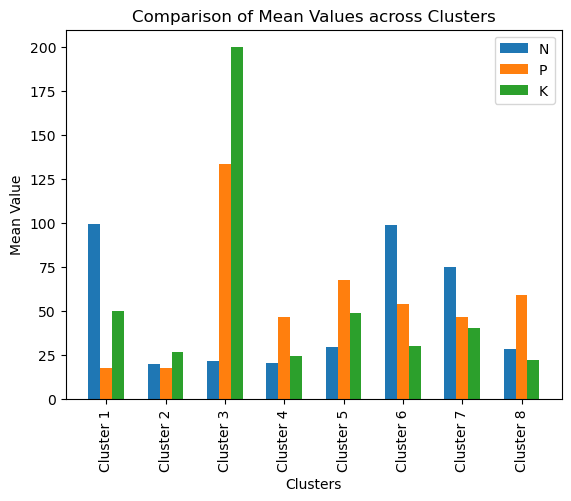

In [152]:
fields_to_compare = ['N','P','K'] 
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7','Cluster 8'] 
clusters = [C1, C2, C3, C4, C5, C6, C7, C8]

compare_means_across_clusters(clusters, fields_to_compare, cluster_labels)

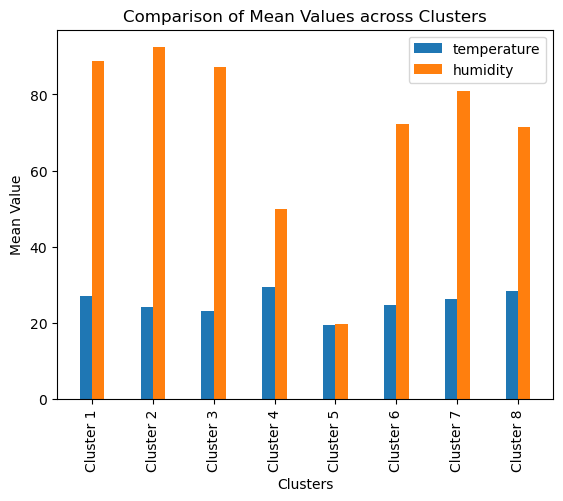

In [66]:
fields_to_compare = ['temperature','humidity'] 
cluster_labels = ['Cluster 1', 'Cluster 2', 'Cluster 3','Cluster 4','Cluster 5','Cluster 6','Cluster 7','Cluster 8'] 
clusters = [C1, C2, C3, C4, C5, C6, C7, C8]

compare_means_across_clusters(clusters, fields_to_compare, cluster_labels)